In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy, sparse_categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


In [2]:
#Path to folders
train_path = 'data/train'
valid_path = 'data/validation'

In [3]:
#Preparing images for VGG16
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['burger','cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['burger','cat'], batch_size=4)

Found 2119 images belonging to 2 classes.
Found 742 images belonging to 2 classes.


In [4]:
#Give a visual representation of labels and images asociated
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols,i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

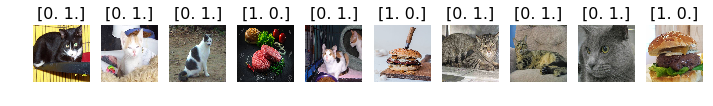

In [5]:
#Show Images
imgs, labels = next(train_batches)
plots(imgs, titles=labels)

In [6]:
#Get VGG16 model, and deleting last layer
vgg16_model = keras.applications.vgg16.VGG16()
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [7]:
#Freeze all layers
for layer in model.layers:
    layer.trainable = False

In [8]:
#Add layer for predictions, and activation
model.add(Dense(2, activation='softmax'))

In [9]:
#Our learning rate, and loss method
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# TRAIN TIME!
model.fit_generator(train_batches, steps_per_epoch=4, validation_data=valid_batches, validation_steps=4, epochs=20, verbose=1)

Epoch 1/20
4/4 [==============================] - 349s 87s/step - loss: 1.2987 - acc: 0.5000 - val_loss: 1.4287 - val_acc: 0.4151
Epoch 2/20
4/4 [==============================] - 355s 89s/step - loss: 1.0367 - acc: 0.4750 - val_loss: 1.0685 - val_acc: 0.5337
Epoch 3/20
4/4 [==============================] - 366s 92s/step - loss: 1.5912 - acc: 0.3000 - val_loss: 0.7501 - val_acc: 0.6698
Epoch 4/20
4/4 [==============================] - 366s 92s/step - loss: 0.6436 - acc: 0.6500 - val_loss: 0.5450 - val_acc: 0.7547
Epoch 5/20
4/4 [==============================] - 341s 85s/step - loss: 0.6923 - acc: 0.7250 - val_loss: 0.4114 - val_acc: 0.8113
Epoch 6/20
4/4 [==============================] - 333s 83s/step - loss: 0.4232 - acc: 0.8500 - val_loss: 0.3233 - val_acc: 0.8652
Epoch 7/20
4/4 [==============================] - 327s 82s/step - loss: 0.2113 - acc: 0.9250 - val_loss: 0.2552 - val_acc: 0.9003
Epoch 8/20
4/4 [==============================] - 316s 79s/step - loss: 0.2019 - acc: 0.90

In [42]:
#Function for predictions
def predict(file):
    x = load_img(file, target_size=(224,224))
    x = img_to_array(x)
    x = np.expand_dims(x, axis=0)
    array = model.predict( x, batch_size=14, verbose=1)
    #result = array[0]
    #answer = np.argmax(result)
    return array

In [43]:
#Predict!
predict('./burger2.jpg')

1/1 [==============================] - 0s 417ms/step


array([[0.6781671 , 0.32183295]], dtype=float32)